In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt

import scipy as sp
import scipy.linalg
import scipy.optimize
# from scipy import optimize

import glob

# # import lsqfit
# from lib import Jackknife
# from lib import simple_mean
# from lib import format_print

# plt.rcParams['figure.dpi'] = 300

In [2]:
class Jackknife:
    def __init__( self, len_data, binsize ):
        self.binsize = binsize
        self.nbins = math.floor( len_data/self.binsize )
        self.N = self.binsize * self.nbins
        self.jack_avg = []
        self.est = 0
        self.var_est = 0

    def set( self, func, list_of_data ):
        for i in range( self.nbins ):
            self.jack_avg.append( func( i, self.binsize, list_of_data ) )

    def do_it( self ):
        for i in range( 0, self.nbins ):
            self.est += self.jack_avg[i]
        self.est /= self.nbins

        for i in range( 0, self.nbins ):
            self.var_est += ( self.jack_avg[i] - self.est )**2
        self.var_est /= self.nbins
        self.var_est *= self.nbins -1

    def mean( self ):
        return self.est

    def var( self ):
        return self.var_est

    def err( self ):
        return np.sqrt(self.var_est)

def simple_mean(i, binsize, np_data):
    resmpld = np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
    return np.mean(resmpld, axis=0)

def format_print(cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'

def format_print_w_exact(exact, cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'+': '+'{num:.{width}f}'.format(num=(exact-cen)/err, width=i+1)+' sigma'

In [12]:
dat = np.loadtxt("prop_temporal_L16_Nt32.dat")

dat64 = np.loadtxt("prop_temporal_L16_Nt64.dat")

In [13]:
dat

array([[ 0.00000e+00,  1.59076e+02, -6.29486e-12],
       [ 0.00000e+00, -1.41634e-10,  9.27602e-11],
       [ 1.00000e+00, -1.64553e+01, -1.34787e-11],
       [ 1.00000e+00, -1.36388e-10,  9.54609e-11],
       [ 2.00000e+00, -1.07653e+01, -2.02009e-11],
       [ 2.00000e+00, -1.29782e-10,  9.64989e-11],
       [ 3.00000e+00, -7.31717e+00, -2.62830e-11],
       [ 3.00000e+00, -1.21945e-10,  9.59074e-11],
       [ 4.00000e+00, -5.16675e+00, -3.16193e-11],
       [ 4.00000e+00, -1.13082e-10,  9.38349e-11],
       [ 5.00000e+00, -3.78649e+00, -3.61704e-11],
       [ 5.00000e+00, -1.03404e-10,  9.04929e-11],
       [ 6.00000e+00, -2.87553e+00, -3.99504e-11],
       [ 6.00000e+00, -9.31022e-11,  8.61173e-11],
       [ 7.00000e+00, -2.25866e+00, -4.30113e-11],
       [ 7.00000e+00, -8.23373e-11,  8.09426e-11],
       [ 8.00000e+00, -1.83154e+00, -4.54289e-11],
       [ 8.00000e+00, -7.12363e-11,  7.51825e-11],
       [ 9.00000e+00, -1.53068e+00, -4.72904e-11],
       [ 9.00000e+00, -5.98964e

In [19]:
def G(t, nmax=100):
    res = 0.0
    for n in range(nmax):
        res += (n+1.0) * sp.special.k0( (n+1.0)*t )
    return res

In [24]:
analy = np.array([ [t, G(t)] for t in np.linspace(0.001, 2.0, 100) ])

(0.0, 2.0)

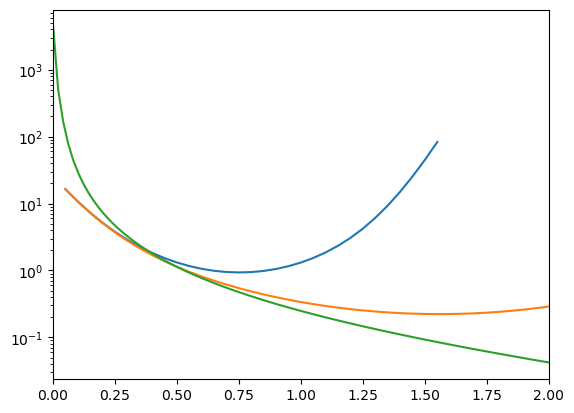

In [30]:
plt.plot( 0.05*dat.T[0][::2][1:], -dat.T[1][::2][1:] )
plt.plot( 0.05*dat64.T[0][::2][1:], -dat64.T[1][::2][1:] )

plt.plot( analy.T[0], 0.3*analy.T[1] )

plt.yscale( "log" )

plt.xlim(0,2)

In [3]:
res_list=[]

binsize=10

In [4]:
path="./beta50.000000at0.036934nt64L2ratio0.500000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [5]:
path="./beta50.000000at0.073868nt64L2ratio1.000000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [6]:
path="./beta50.000000at0.069197nt64L1ratio0.500000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [7]:
path="./beta50.000000at0.138394nt64L1ratio1.000000/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [8]:
res_list

[['./beta50.000000at0.036934nt64L2ratio0.500000/',
  array([ 4.86527336e-01,  3.46953654e-01,  2.60008476e-01,  1.93570978e-01,
          1.49041934e-01,  1.07093731e-01,  8.26827056e-02,  6.87821469e-02,
          4.62067287e-02,  4.08310369e-02,  2.89320817e-02,  2.84010982e-02,
          1.39596658e-02,  2.01908821e-02,  1.24615319e-02,  9.70361267e-03,
          8.57758902e-03,  9.16040460e-03,  7.78334713e-03,  4.65622509e-04,
          1.05663768e-02,  1.61337801e-03,  5.68004834e-03,  2.67886247e-04,
          7.58272362e-03, -4.13095854e-04,  2.54980761e-03,  4.50907510e-03,
          1.57507545e-04,  3.29467560e-03,  2.23929082e-04,  6.22744262e-03,
         -3.29076723e-03,  6.22744262e-03,  2.23929082e-04,  3.29467560e-03,
          1.57507545e-04,  4.50907510e-03,  2.54980761e-03, -4.13095854e-04,
          7.58272362e-03,  2.67886247e-04,  5.68004834e-03,  1.61337801e-03,
          1.05663768e-02,  4.65622509e-04,  7.78334713e-03,  9.16040460e-03,
          8.57758902e-03,

In [9]:
def f(t, nmax):
    res = 0.0
    for n in range(1,nmax):
        res += np.sqrt( n*(n+1.0) ) * (2.0*n+1.0) * np.exp( -np.sqrt( n*(n+1.0) )*t )
    return res/(8.0*np.pi)

In [15]:
1.0/50

0.02

In [10]:
Nt

64

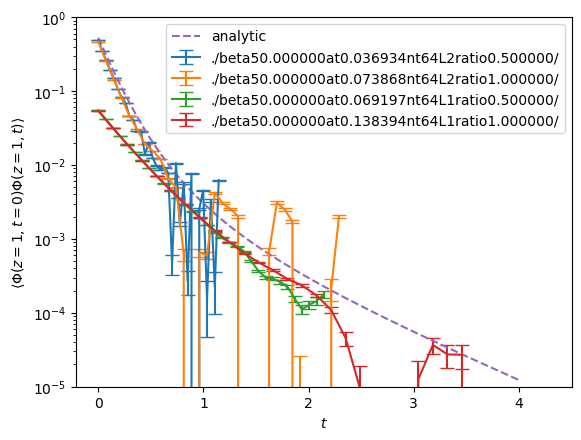

In [16]:
plt.yscale("log")

for res in res_list:
    Nt = res[1].shape[0]

    at = float(res[0].split("at")[1].split("nt")[0])
    xx=np.arange(int(Nt/2)) * at
    # xx=np.arange(Nt)
    yy=res[1][:int(Nt/2)]
    dy=res[2][:int(Nt/2)]

    plt.errorbar( xx, yy, dy, capsize=5, label=res[0] )

# xx=np.arange(Nt)
# yy= 0.07*np.exp( -np.sqrt(2.0) * xx / 8.0 )
# plt.plot( xx, yy )

xx=np.linspace(0, 4.0, 200)
# yy= 0.02*np.exp( -np.sqrt(2.0) * xx * 2.4 )
yy= 0.02*f(xx, 10)
plt.plot( xx, yy, ls="dashed", label="analytic" )

plt.legend()
plt.ylim( 1.0e-5, 1.0e0 )
plt.xlabel("$t$")
plt.ylabel("$\\langle \\Phi(z=1,t=0) \\Phi(z=1,t) \\rangle$")

plt.savefig("gaugecorr.pdf")

In [12]:
50.0/8.0

6.25